# Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Loading Data

In [2]:
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True, download = True, transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train = False, download = True, transform = transforms.ToTensor())

training_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = False)

# Define CNN class and feedforward method

In [16]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, 5), nn.ReLU(), nn.MaxPool2d(2, 2), nn.Conv2d(32, 64, 5), nn.ReLU(), nn.MaxPool2d(2, 2))
    self.fc_model = nn.Sequential(nn.Linear(1024, 256), nn.ReLU(), nn.Linear(256, 10), nn.ReLU(), nn.Linear(10, 10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

# Define Xavier Initialization

In [17]:
def init_weights(m):
    if type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

# Main

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = CNN().to(device)
net.apply(init_weights)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

Epoch 1: loss: 1586.2035140395164, train accuracy: 85.305, valid accuracy:84.35
Epoch 2: loss: 703.9394906908274, train accuracy: 88.68333333333334, valid accuracy:87.6
Epoch 3: loss: 581.6504249200225, train accuracy: 90.05666666666667, valid accuracy:88.6
Epoch 4: loss: 515.7150413841009, train accuracy: 90.54333333333334, valid accuracy:89.02
Epoch 5: loss: 465.6253887601197, train accuracy: 91.06666666666666, valid accuracy:89.25
Epoch 6: loss: 424.98523696511984, train accuracy: 91.645, valid accuracy:89.07
Epoch 7: loss: 388.51112507656217, train accuracy: 92.00833333333334, valid accuracy:89.64
Epoch 8: loss: 359.231108257547, train accuracy: 92.23666666666666, valid accuracy:89.55
Epoch 9: loss: 326.91849150368944, train accuracy: 92.45333333333333, valid accuracy:89.37
Epoch 10: loss: 306.69453267753124, train accuracy: 92.405, valid accuracy:89.25
Epoch 11: loss: 286.4321029721759, train accuracy: 93.24166666666666, valid accuracy:89.66
Epoch 12: loss: 271.8551187510602, trai

# plots

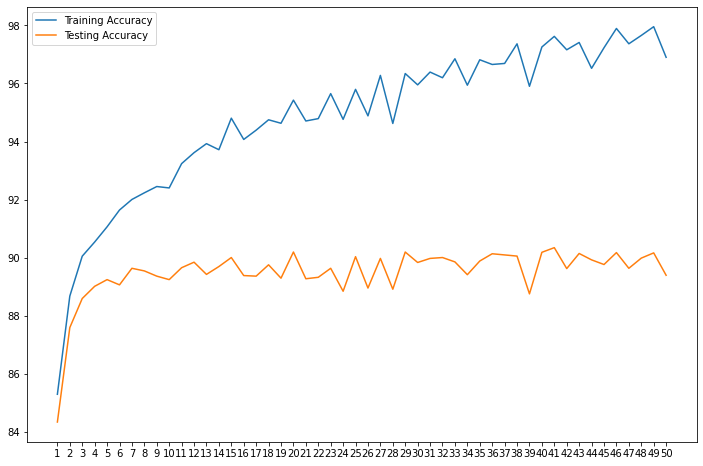

In [19]:
plt.figure(figsize = (12,8))
plt.xticks(np.arange(len(train_accuracy)), np.arange(1, len(train_accuracy)+1))
plt.plot(train_accuracy)
plt.plot(valid_accuracy)
plt.legend(['Training Accuracy', 'Testing Accuracy'])

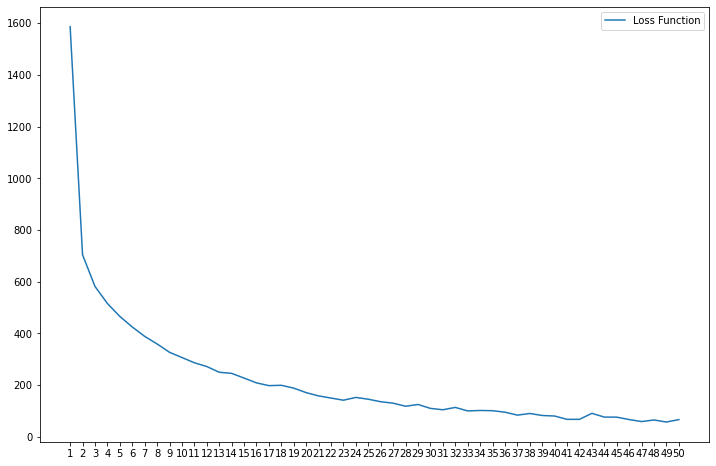

In [20]:
plt.figure(figsize = (12,8))
plt.xticks(np.arange(len(loss_epoch_array)), np.arange(1, len(loss_epoch_array)+1))
plt.plot(loss_epoch_array)
plt.legend(['Loss Function'])